<a href="https://colab.research.google.com/github/adams-gc/AI_SOLUTION_/blob/main/sentiment_analysis__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The uploaded ZIP file has been extracted, and it contains the file: Let me load and preview the content to understand its structure.

The dataset contains the following columns:

- clean_text: The processed tweets (text data).
- category: The label representing sentiment or emotion:
  - `-1.0`: Negative emotion/sentiment.
  - `0.0`: Neutral sentiment.
  - `1.0`: Positive emotion/sentiment.



In [ ]:
import zipfile
import os

# Unzip the uploaded file
uploaded_file_path ='/content/Twitter_Data.csv (1).zip'
extracted_folder_path = '/mnt/data/Twitter_Data'

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the extracted files to see the contents
os.listdir(extracted_folder_path)


['Twitter_Data.csv']

# Twitter Sentiment Analysis Dataset: Project Pipeline
### The various steps involved in the Machine Learning Pipeline are:

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Visualization of Target Variables
- Data Preprocessing
- Splitting our data into Train and Test sets.
- Transforming Dataset using TF-IDF Vectorizer
- Function for Model Evaluation
- Model Building
- Model Evaluation

Step-1: Import the Necessary Dependencies

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd

# Load the extracted CSV file
csv_file_path = os.path.join(extracted_folder_path, 'Twitter_Data.csv')
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
data.head()


clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [ ]:
data.shape

(162980, 2)

In [ ]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
print('length of data is', len(data))

length of data is 162969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
data['category'].unique()

array([-1.,  0.,  1.])

In [ ]:
data['clean_text'].unique()

array(['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
       'talk all the nonsense and continue all the drama will vote for modi ',
       'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
       ..., 'did you cover her interaction forum where she left ',
       'there big project came into india modi dream project but not happened reality',
       'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for '],
      dtype=object)

# visualization

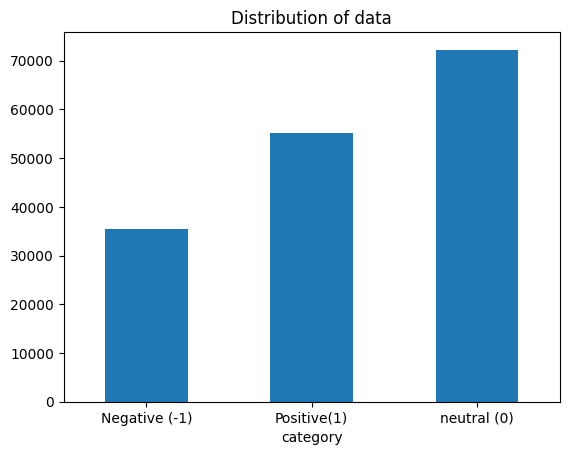

In [ ]:
# Plotting the distribution for dataset.
ax = data.groupby('category').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative (-1)','Positive(1)' ,'neutral (0)'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['clean_text']), list(data['category'])

# Data Preprocessing
In the above-given problem statement, before training the model, we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing special characters like emojis, hashtags, etc. The text document is then converted into lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed, thereby reducing the unnecessary noise from the dataset. After that, we also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.



In [ ]:
# Separating positive and negative tweets
data_pos= data[data.category == 1]
data_neg = data[data.category == -1]
data_neu = data[data.category == 0]

In [ ]:
data_pos=data[data.category==1]

In [ ]:
data_pos

clean_text  category
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
8       with upcoming election india saga going import...       1.0
9                              gandhi was gay does modi         1.0
...                                                   ...       ...
162969  objective cover everything from akhlaq ramalin...       1.0
162970  raga knows dat wont spared modi courts for his...       1.0
162972  engine growth modi unveils indias first 12000 ...       1.0
162973  modi promised 2014 lok sabha elections that be...       1.0
162979  have you ever listen about like gurukul where ...       1.0

[72249 rows x 2 columns]

In [ ]:
#Taking one-fourth of the data so we can run it on our machine easily

data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data_neu = data_neu.iloc[:int(20000)]

In [ ]:
# data_pos.shapeA

In [ ]:
# Combining positive and negative,neutral tweets
dataset = pd.concat([data_pos, data_neg, data_neu])

In [ ]:
dataset['clean_text']=dataset['clean_text'].str.lower()
dataset['clean_text'].tail()
#Making statement text in lowercase

58378                             modi didn’ blame nehru  
58379    ahead the 2019 lok sabha election prime minist...
58382    reminds that bully school who would tell every...
58385    modi biggest shame india hopefully this joker ...
58390                                      modi soul india
Name: clean_text, dtype: object

In [ ]:
#Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['clean_text'] = dataset['clean_text'].apply(lambda clean_text: cleaning_stopwords(clean_text))
dataset['clean_text'].head()

2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
8    upcoming election india saga going important p...
9                                      gandhi gay modi
Name: clean_text, dtype: object

In [ ]:
#Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(clean_text):
    translator = str.maketrans('', '', punctuations_list)
    return clean_text.translate(translator)
dataset['clean_text']= dataset['clean_text'].apply(lambda x: cleaning_punctuations(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead 2019 lok sabha election prime minister n...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [ ]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(clean_text):
    return re.sub(r'(.)1+', r'1', clean_text)
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: cleaning_repeating_char(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead 219 lok sabha election prime minister na...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [ ]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: cleaning_URLs(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead 219 lok sabha election prime minister na...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [ ]:
# Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: cleaning_numbers(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead  lok sabha election prime minister naren...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [ ]:
# tokanizing
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['clean_text'] = dataset['clean_text'].apply(tokenizer.tokenize)
dataset['clean_text'].head()

2          [w]
3       [w, w]
4    [w, w, w]
8          [w]
9           []
Name: clean_text, dtype: object

In [ ]:
# streaming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['clean_text']= dataset['clean_text'].apply(lambda x: stemming_on_text(x))
dataset['clean_text'].head()

2          [w]
3       [w, w]
4    [w, w, w]
8          [w]
9           []
Name: clean_text, dtype: object

In [ ]:
import nltk

# Download the 'wordnet' resource
nltk.download('wordnet')


# Applying lemmatizer
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['clean_text'] = dataset['clean_text'].apply(lambda x: lemmatizer_on_text(x))
dataset['clean_text'].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2          [w]
3       [w, w]
4    [w, w, w]
8          [w]
9           []
Name: clean_text, dtype: object

In [ ]:
# seperate and leabel feaature
X=data.clean_text
y=data.category

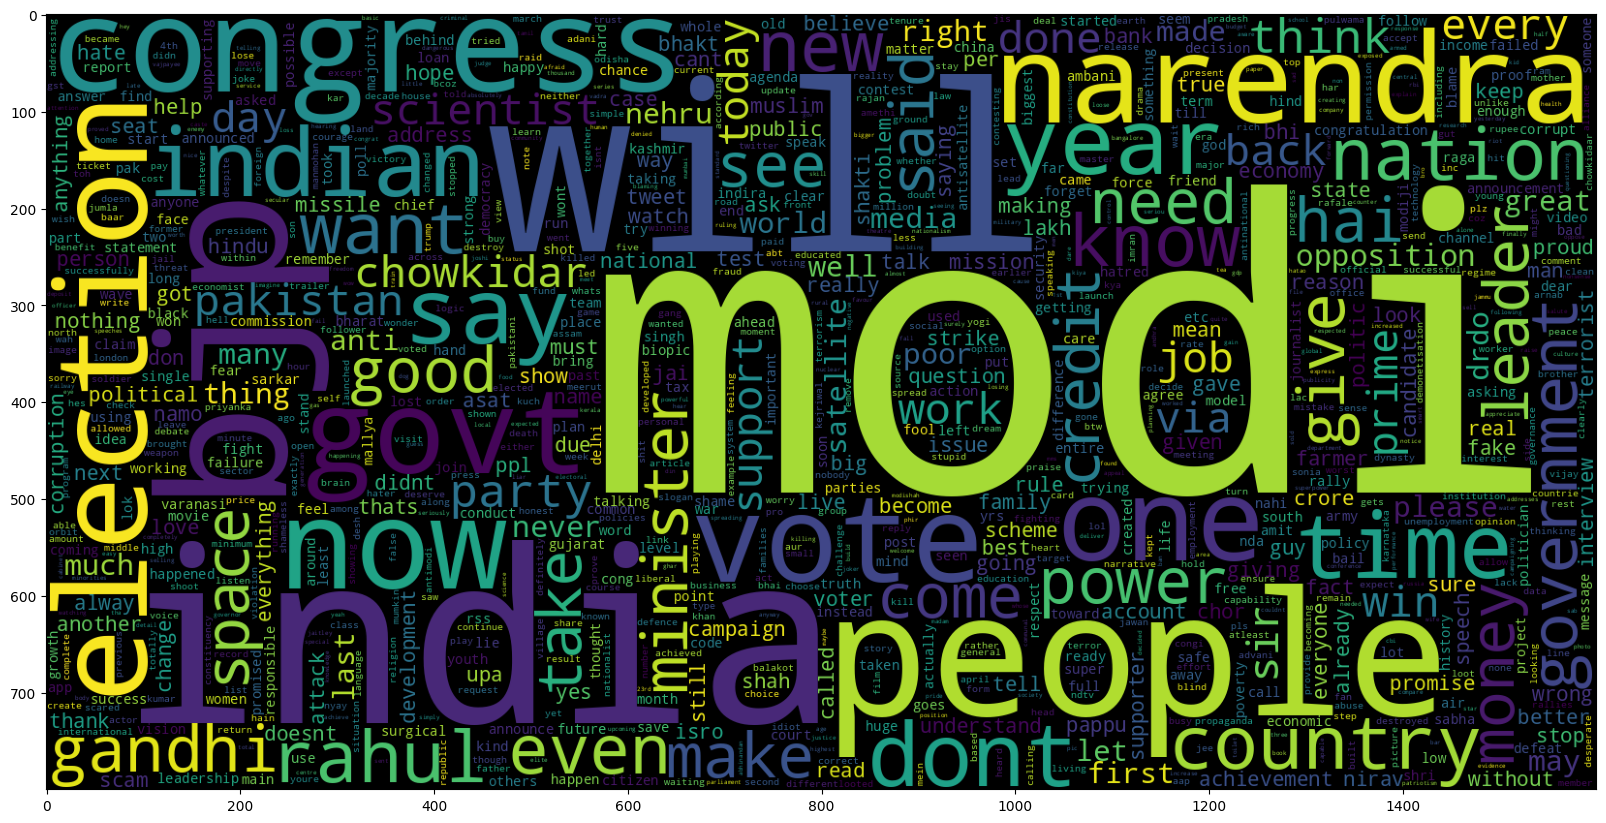

In [ ]:
#  Plot a cloud of words for negative tweets
data_neg = data['clean_text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
# this cloud of word show the highest repeating word is modi ,india ,bjp


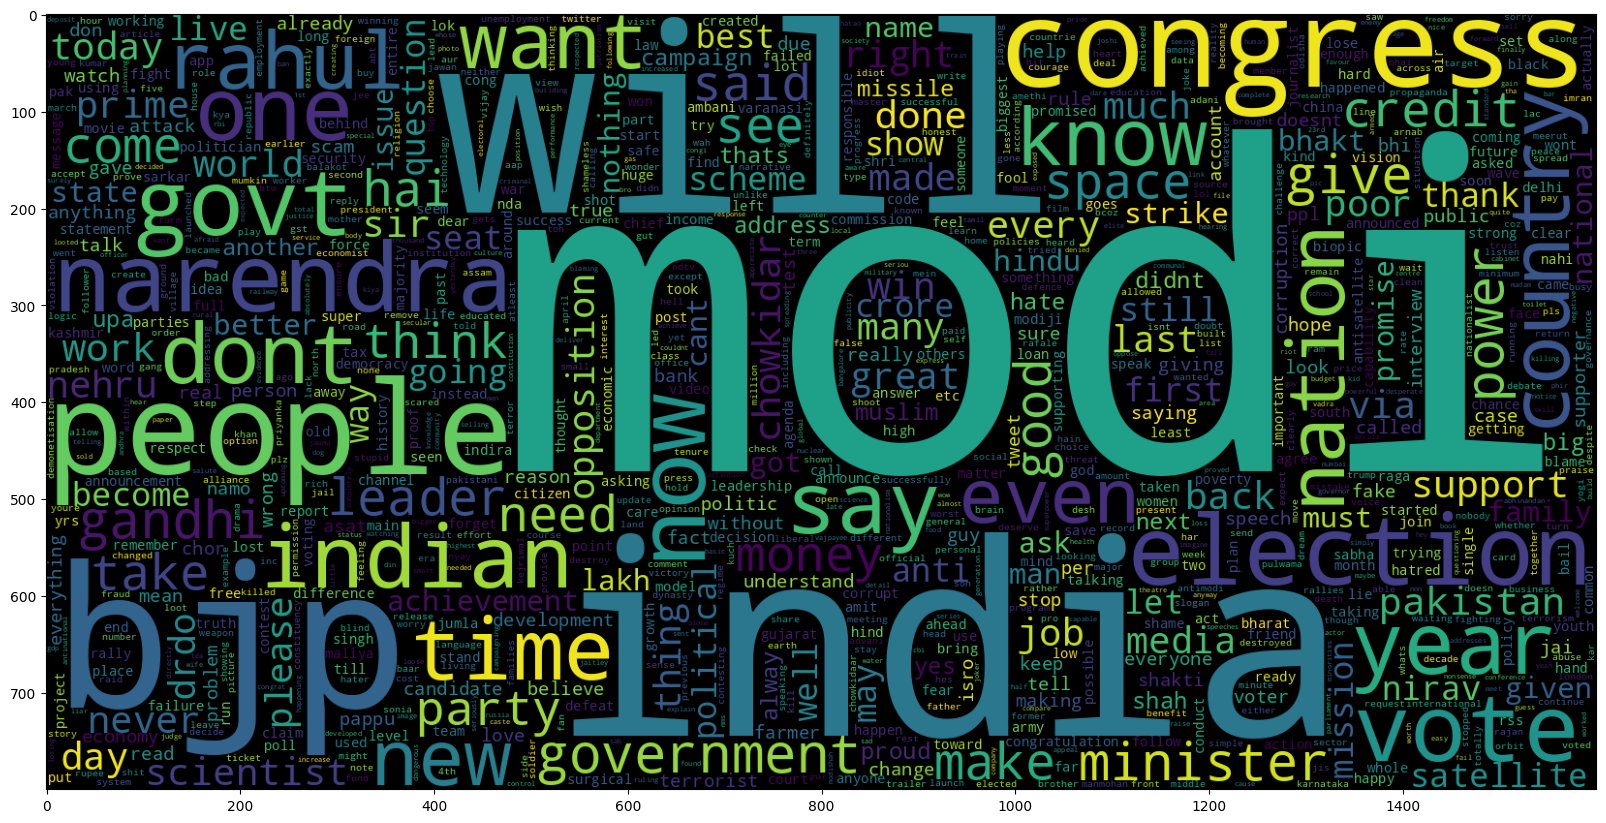

In [ ]:
# plot a cloud of words for posetive  tweets

data_pos = data['clean_text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

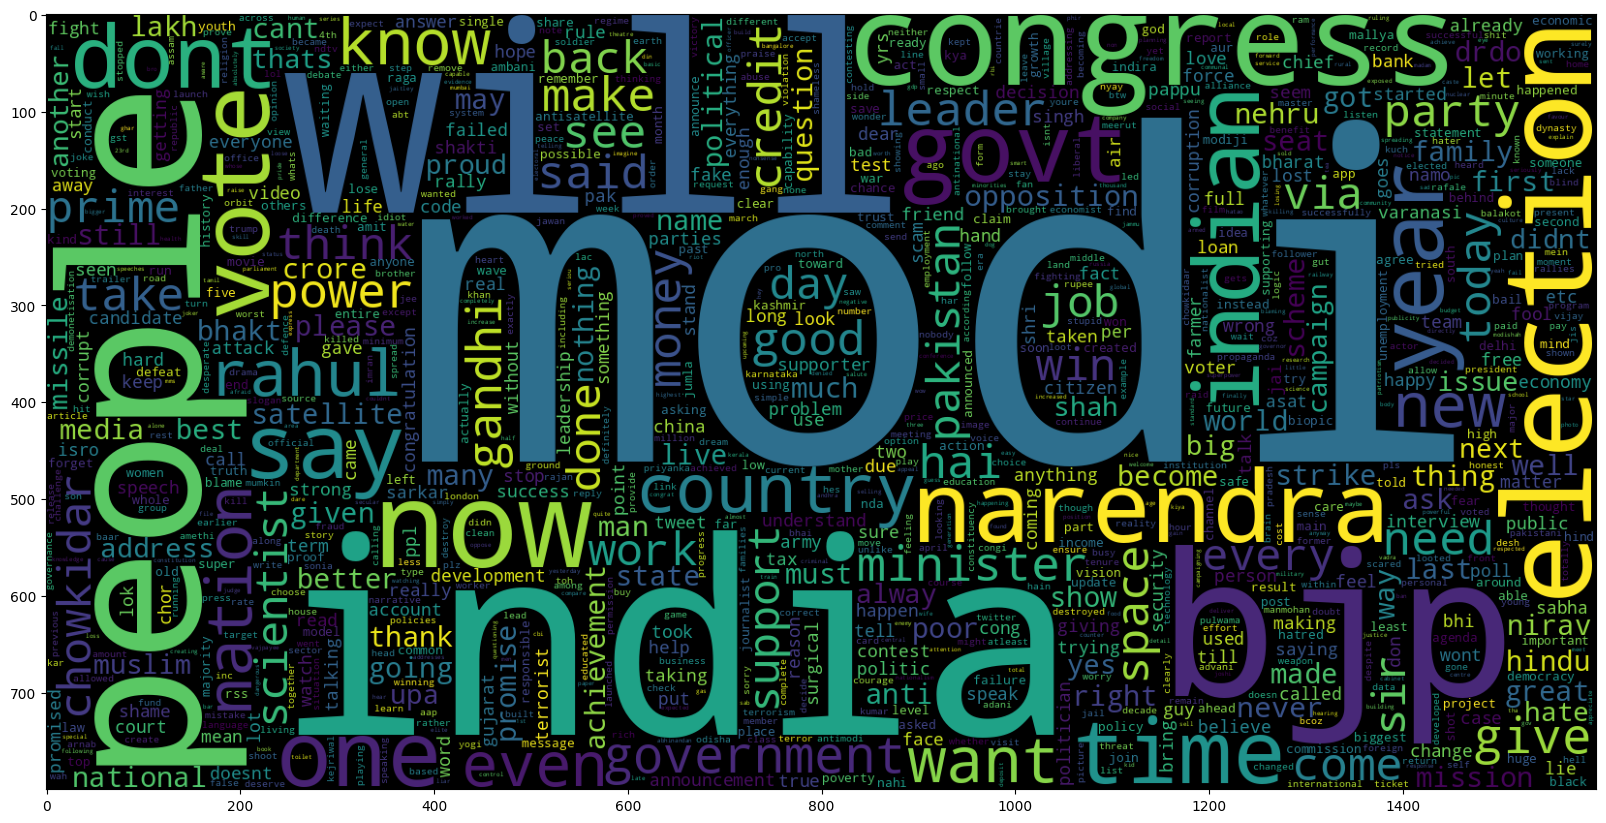

In [ ]:
#  Plot a cloud of words for neutral tweets
data_neu = data['clean_text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neu))
plt.imshow(wc)

In [ ]:
# traning and test model to spelite data
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:

#Transforming the Dataset Using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out())) # Use get_feature_names_out() instead of get_feature_names()

No. of feature_words:  500000


In [ ]:
# transfer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

#Function for Model Evaluation
After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance  of the models respectively:

- Accuracy Score
- Confusion Matrix with Plot
- ROC-AUC Curve

              precision    recall  f1-score   support

        -1.0       0.79      0.36      0.49      1801
         0.0       0.71      0.85      0.77      2669
         1.0       0.73      0.83      0.78      3679

    accuracy                           0.73      8149
   macro avg       0.75      0.68      0.68      8149
weighted avg       0.74      0.73      0.71      8149



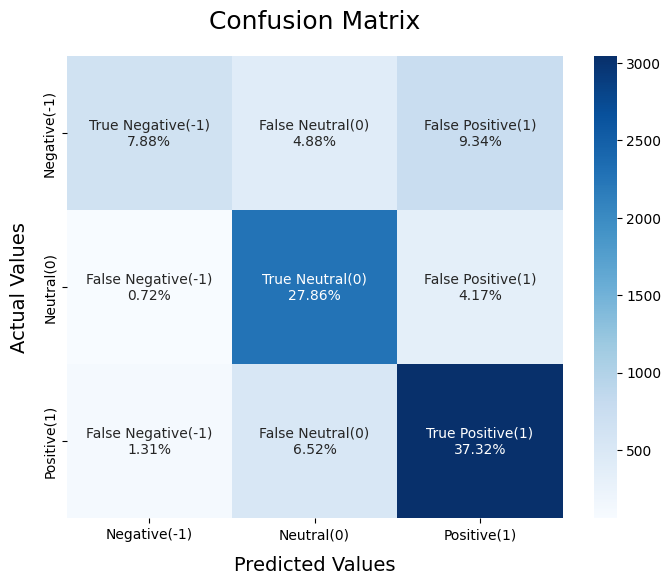

array([ 0., -1.,  0., ..., -1.,  0.,  0.])

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def model_Evaluate(model):
    # Predict values for the test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion Matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative(-1)', 'Neutral(0)', 'Positive(1)']
    n_classes = len(categories)

    group_names = [f'True {categories[i]}' if i == j else f'False {categories[j]}'
                   for i in range(n_classes) for j in range(n_classes)]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(n_classes, n_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted Values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual Values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

    # Display the plot
    plt.show()

    return y_pred # Return y_pred

# model :1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred = model_Evaluate(BNBmodel) # Assign the returned value to y_pred


# Now you can access y_pred:
y_pred

#Model Building
In the problem statement, we have used three different models respectively :

- Bernoulli Naive Bayes Classifier
- SVM (Support Vector Machine)
- Logistic Regression
The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

In [ ]:
# # model :1
# BNBmodel = BernoulliNB()
# BNBmodel.fit(X_train, y_train)
# model_Evaluate(BNBmodel)
# y_pred1 = BNBmodel.predict(X_test)

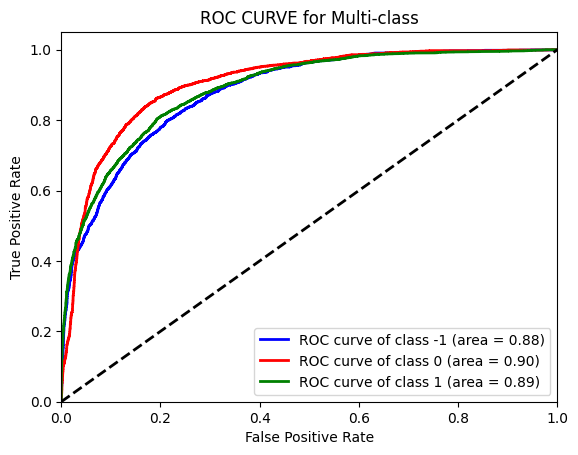

In [ ]:
# # Plot the ROC-AUC Curve for model-1

# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC CURVE')
# plt.legend(loc="lower right")
# plt.show()


# Plot the ROC-AUC Curve for model-1
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1]) # your classes are -1, 0, and 1
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other using OneVsRestClassifier
classifier = OneVsRestClassifier(BNBmodel) # Use your trained model here
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green'] # Adjust colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i-1, roc_auc[i])) # Adjust class labels as needed (i-1 to match -1, 0, 1)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Multi-class')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

        -1.0       0.92      0.88      0.90      1801
         0.0       0.95      0.97      0.96      2669
         1.0       0.95      0.95      0.95      3679

    accuracy                           0.94      8149
   macro avg       0.94      0.93      0.94      8149
weighted avg       0.94      0.94      0.94      8149



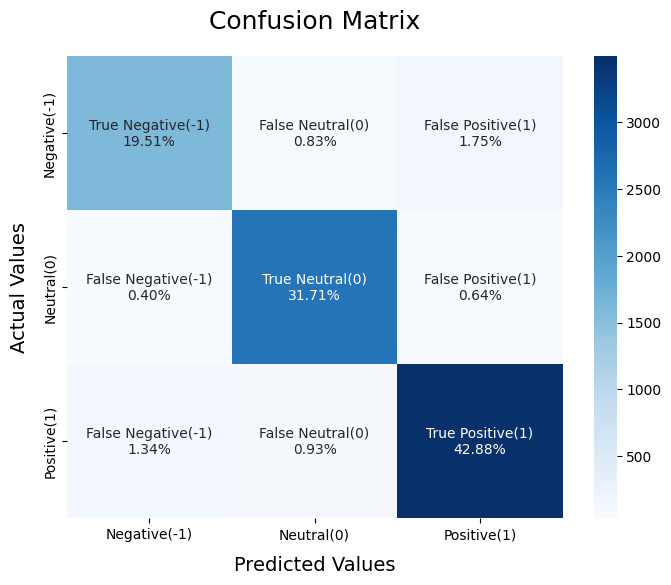

In [ ]:
#Model-2:

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC CURVE')
# plt.legend(loc="lower right")
# plt.show()

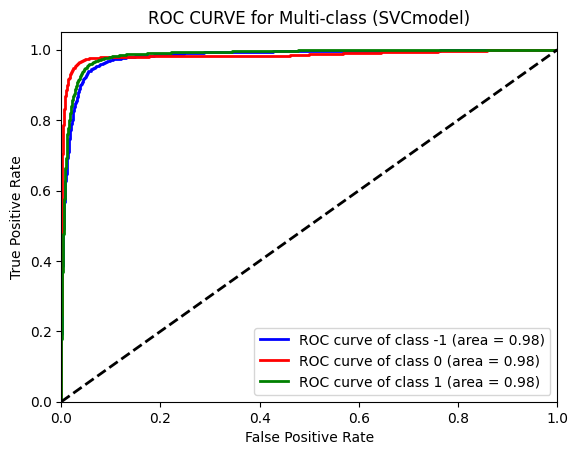

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])  #  your classes are -1, 0, and 1
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other using OneVsRestClassifier
classifier = OneVsRestClassifier(SVCmodel)  # Use your trained model here (SVCmodel in this case)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)  # Use decision_function for SVC

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']  # Adjust colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i - 1, roc_auc[i]))  # Adjust class labels as needed (i-1 to match -1, 0, 1)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Multi-class (SVCmodel)')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

        -1.0       0.91      0.81      0.85      1801
         0.0       0.90      0.96      0.93      2669
         1.0       0.92      0.93      0.92      3679

    accuracy                           0.91      8149
   macro avg       0.91      0.90      0.90      8149
weighted avg       0.91      0.91      0.91      8149



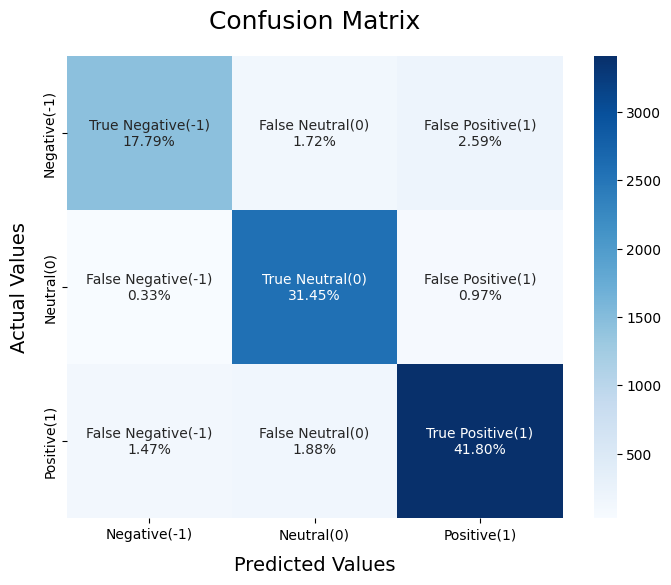

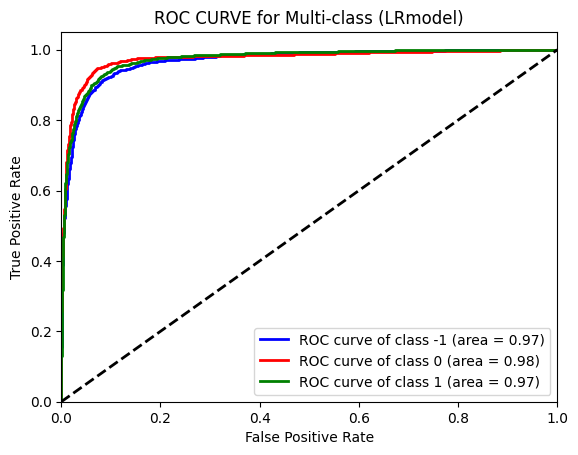

save the model 


In [ ]:
#Model-3: Logistic Regression

LRmodel = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression model
LRmodel.fit(X_train, y_train)  # Train the model
y_pred3 = model_Evaluate(LRmodel)  # Evaluate and get predictions for the test set
# %%
# Plot the ROC-AUC Curve for model-3
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LRmodel)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i - 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Multi-class (LRmodel)')
plt.legend(loc="lower right")
plt.show()



# save train model
import pickle
# After training the LRmodel:
with open('LogisticRegression.pickle', 'wb') as file:
    pickle.dump(LRmodel, file)

print ('save the model ')

# Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.

In [ ]:
# news = input("Enter news = ")
# news_data = {'predict_news':[news]}
# news_data_df = pd.DataFrame(news_data)
# # news_data_df
# # Replace 'model' with the desired model (e.g., BNBmodel, SVCmodel, or LRmodel)
# predict_news_cat = LRmodel.predict(vectoriser.transform(news_data_df['predict_news']))  # Apply vectorizer to the new data
# print("Predicted news category = ",predict_news_cat[0])
# if predict_news_cat == 1:
#   print("Positive")
# elif predict_news_cat == -1:
#   print("Negative")
# else:
#   print("Neutral")

In [ ]:
news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
# news_data_df
# Replace 'model' with the desired model (e.g., BNBmodel, SVCmodel, or LRmodel)
predict_news_cat = LRmodel.predict(vectoriser.transform(news_data_df['predict_news']))  # Apply vectorizer to the new data
print("Predicted news category = ",predict_news_cat[0])
if predict_news_cat == 1:
  print("Positive")
elif predict_news_cat == -1:
  print("Negative")
else:
  print("Neutral")

Enter news = This is the worst purchase I've ever made!
Predicted news category =  -1.0
Negative


In [ ]:
# import pickle
# load_model = pickle.load(open('LogisticRegression.pickle', 'rb'))
# pred = load_model.predict(news_data_df['predict_news'])
# pred

load_model = pickle.load(open('LogisticRegression.pickle', 'rb'))
# Access the correct column 'predict_news' for prediction
pred = load_model.predict(vectoriser.transform(news_data_df['predict_news']))
pred

array([-1.])

In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(confusion_matrix(ytest,LRmodel.predict(X_test)))
print(classification_report(ytest,LRmodel.predict(X_test))) # Assuming you want to use LRmodel
print(confusion_matrix(LRmodel.predict(X_test),ytest)) # Assuming you want to use LRmodel

[[1450  140  211]
 [  27 2563   79]
 [ 120  153 3406]]
              precision    recall  f1-score   support

        -1.0       0.91      0.81      0.85      1801
         0.0       0.90      0.96      0.93      2669
         1.0       0.92      0.93      0.92      3679

    accuracy                           0.91      8149
   macro avg       0.91      0.90      0.90      8149
weighted avg       0.91      0.91      0.91      8149

[[1450   27  120]
 [ 140 2563  153]
 [ 211   79 3406]]


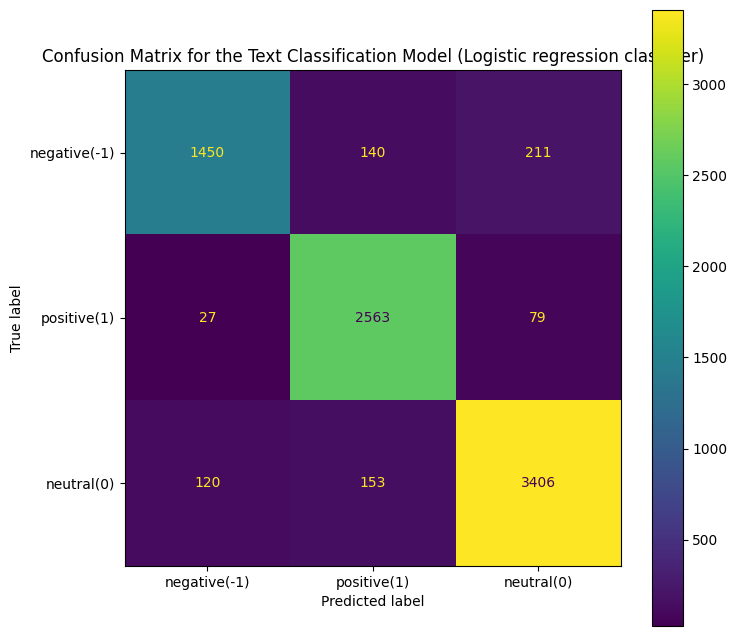

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#  use LRmodel for the confusion matrix
cm = confusion_matrix(y_test, LRmodel.predict(X_test))

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
class_names = ['negative(-1)', 'positive(1)', 'neutral(0)']

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Text Classification Model (Logistic regression classifier)')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);






#This project focuses on sentiment analysis of text data, specifically classifying news articles into positive, negative, or neutral categories.  The process involves several key steps:



1.Data Preprocessing:  The raw text data undergoes a series of cleaning operations.  This includes removing stop words (common words like "the," "a," "is"), special characters (emojis, hashtags), punctuation, and URLs.  The text is converted to lowercase for consistency.  Repeating characters and numbers are also removed.  Tokenization (splitting text into individual words) and stemming/lemmatization (reducing words to their root form) further refine the data for analysis.




2.Exploratory Data Analysis (EDA): Word clouds are generated for each sentiment category (positive, negative, neutral) to visualize the most frequent words associated with each. This step provides insights into the language used in different sentiment expressions.  The EDA helps in understanding the dataset characteristics and potential model biases.




3.Feature Extraction: The preprocessed text is converted into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.  This technique assigns weights to words based on their importance within a document and across the entire corpus.  Bigrams (pairs of words) are also considered to capture contextual relationships between words.



4.Model Training and Evaluation: Three different classification models are trained and evaluated:
    * Bernoulli Naive Bayes:A probabilistic classifier assuming feature independence.


    * Linear Support Vector Machine (SVM):A powerful algorithm for finding optimal hyperplanes to separate data points.


    * Logistic Regression: A statistical model predicting the probability of a binary outcome (though adaptable to multi-class scenarios).

    Each model is evaluated using metrics like accuracy, precision, recall, F1-score, and confusion matrices. ROC-AUC curves are also plotted to visualize the models' performance in distinguishing between the different sentiment categories


5.Model Selection and Deployment: Based on the evaluation metrics, Logistic Regression demonstrates the best overall performance. This model is then saved for future use.  A simple input mechanism allows users to enter news text and receive the predicted sentiment category. The confusion matrix and classification report are also provided to analyze performance for the best performing model. The confusion matrix visualizes the relationship between the model’s predicted sentiments and the actual sentiments.



Conclusion:
The project successfully implements a sentiment analysis system using various machine learning techniques. The Logistic Regression model exhibits the highest accuracy and robustness among the tested classifiers.  The preprocessing and feature engineering techniques play crucial roles in improving the models' performance.  The provided user interface and model persistence facilitate the application's usability and deployment.



* Summary:

The sentiment analysis project demonstrates text classification using TF-IDF vectorization and machine learning models.  Logistic Regression is identified as the best performing model after evaluation with standard metrics, outperforming SVM and Bernoulli Naive Bayes. The project includes data preprocessing, EDA through word clouds, and a user-friendly prediction interface.

* Best Algorithm for this model:

Logistic Regression demonstrates superior performance in this project compared to the other two algorithms considered.  It provides a balance of accuracy and efficiency. While other algorithms like SVM may perform slightly better in some specific scenarios, Logistic Regression is easier to interpret.  This makes it a better choice overall.


# taking refrence to solve this project :
- chatGpt
- google bard
- www.analyticsvidhya.com education


submitted by:
 DHANANJAY G.C                           submitted to : Zidio


- PROJECT IN GITHUB:https://github.com/adams-gc/ml_project_coffee/blob/main/sentiment_analysis__project.ipynb

- project in drive :